# Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


# Load the dataset

In [2]:
data = pd.read_csv("employees_dataset.csv")
print(data.head())


   employee_id         department     region  education gender  \
0         8724         Technology  region_26  Bachelors      m   
1        74430                 HR   region_4  Bachelors      f   
2        72255  Sales & Marketing  region_13  Bachelors      m   
3        38562        Procurement   region_2  Bachelors      f   
4        64486            Finance  region_29  Bachelors      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met_more_than_80  awards_won  avg_training_score  
0                  1                      1           0                  77  
1                  5            

# Preprocessing the data

In [6]:
# Fill missing values in numeric columns with their respective medians
numeric_cols = data.select_dtypes(include=['number']).columns 

# Select only numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['department', 'region', 'education', 'gender', 'recruitment_channel'], drop_first=True)


data.drop(['employee_id'], axis=1, inplace=True)

print(data.info())

 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               17417 non-null  int64  
 1   age                           17417 non-null  int64  
 2   previous_year_rating          17417 non-null  float64
 3   length_of_service             17417 non-null  int64  
 4   KPIs_met_more_than_80         17417 non-null  int64  
 5   awards_won                    17417 non-null  int64  
 6   avg_training_score            17417 non-null  int64  
 7   department_Finance            17417 non-null  bool   
 8   department_HR                 17417 non-null  bool   
 9   department_Legal              17417 non-null  bool   
 10  department_Operations         17417 non-null  bool   
 11  department_Procurement        17417 non-null  bool   
 12  department_R&D                17417 non-null  bool   
 13  d

# Splitting input and output varibale
# train test split the data

In [14]:
# Define features (X) and target variable (y)
X = data.drop(['length_of_service'], axis=1)
y = data['length_of_service']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training the Regression model

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-3.14865558e-02  3.45253782e-01  1.05056649e-01 -6.33096876e-01
 -9.70265370e-01 -1.61827710e-03 -4.18103754e-02 -3.05626197e-02
 -9.09555072e-01  2.28806755e-01 -2.70500275e-02 -3.27022415e-01
 -4.22093660e-02 -7.10900220e-04 -2.83590042e-02  2.45056913e-01
 -5.01333314e-01  7.90845844e-02 -6.08972361e-02  1.06226733e-01
  4.94803712e-02 -3.44228144e-01 -6.25828830e-01 -3.44567370e-01
 -1.51048856e-01  2.07335240e-01 -4.64986352e-01 -3.87294653e-02
 -1.07713363e-01  4.86756839e-02 -1.06126572e-01 -1.06681293e-01
 -8.90682844e-02  1.59367775e-01  5.74282462e-02 -5.10954839e-01
 -1.74247483e-01 -1.00934377e-01 -5.32514778e-01 -4.73640392e-01
  1.02908609e-01 -5.53619835e-02 -3.55846367e-01  2.34110628e-01
  6.01645718e-02 -1.55062301e-01 -5.62658620e-01 -1.25350934e-01
 -4.34032770e-02  4.92662355e-02  1.19278071e-01  4.01565760e-03]
Intercept: -6.128058092897474


# Making predictions

In [11]:
y_pred = model.predict(X_test)
y_pred


array([1.05024509, 6.63678197, 5.02410014, ..., 2.09492999, 6.8654361 ,
       6.21926859])

# Evaluating the model

In [12]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 2.39271239330515
Root Mean Squared Error (RMSE): 3.187159006117886


# Visualizing the results

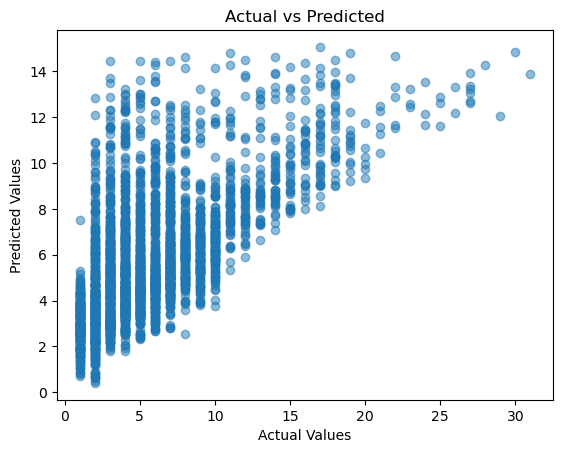

In [16]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()
